In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phems-hackathon-early-sepsis-prediction/SepsisLabel_sample_submission.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/drugsexposure_train.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/observation_train.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/devices_train.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/measurement_lab_train.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/proceduresoccurrences_train.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/person_demographics_episode_train.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/SepsisLabel_train.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/measurement_observation_train.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/measurement_meds_train.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/tes

Devices Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320919 entries, 0 to 320918
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   visit_occurrence_id     320919 non-null  int64 
 1   device_datetime_hourly  320919 non-null  object
 2   person_id               320919 non-null  int64 
 3   device                  320919 non-null  object
dtypes: int64(2), object(2)
memory usage: 9.8+ MB

First Few Rows of Devices Dataset:
   visit_occurrence_id device_datetime_hourly   person_id  \
0              1312385    2022-10-26 10:00:00  1059345944   
1              1312385    2022-10-26 11:00:00  1059345944   
2              1312385    2022-10-26 12:00:00  1059345944   
3              1312385    2022-10-26 13:00:00  1059345944   
4              1312385    2022-10-26 14:00:00  1059345944   

                             device  
0  Arterial blood pressure catheter  
1  Arterial blood pre

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


        visit_occurrence_id device_datetime_hourly     person_id  \
count          3.209190e+05                 320919  3.209190e+05   
unique                  NaN                  48267           NaN   
top                     NaN    2022-09-17 15:00:00           NaN   
freq                    NaN                     16           NaN   
mean           7.227771e+08                    NaN  1.066606e+09   
std            3.586748e+08                    NaN  6.072192e+08   
min            1.312385e+06                    NaN  8.503126e+06   
25%            4.307133e+08                    NaN  5.457494e+08   
50%            8.147889e+08                    NaN  1.029243e+09   
75%            1.014632e+09                    NaN  1.602918e+09   
max            1.343515e+09                    NaN  2.139901e+09   

                  device  
count             320919  
unique                 5  
top     Urinary catheter  
freq               90694  
mean                 NaN  
std                  

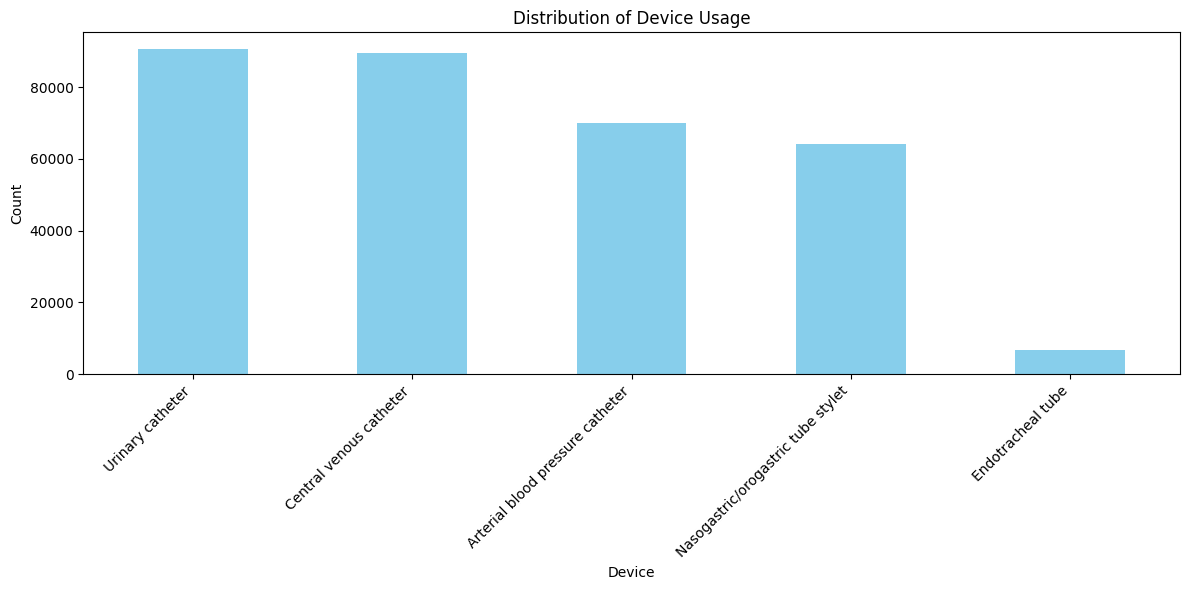

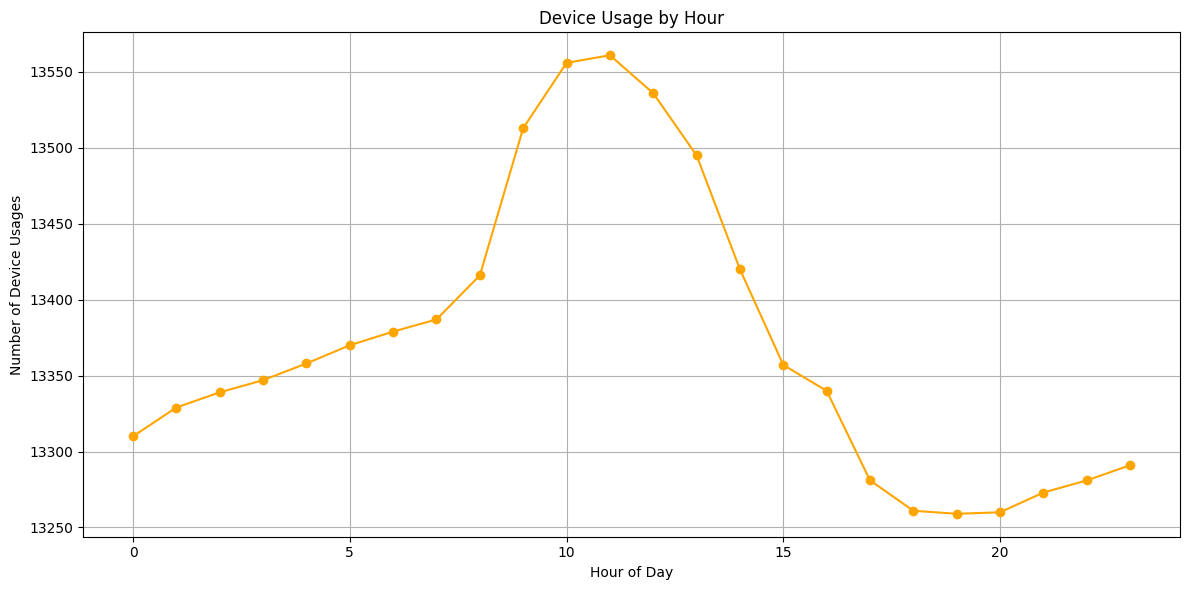


Device Usage Per Patient Summary Statistics:
count      630.000000
mean       509.395238
std       1121.358975
min          4.000000
25%        134.000000
50%        220.000000
75%        450.500000
max      13395.000000
dtype: float64


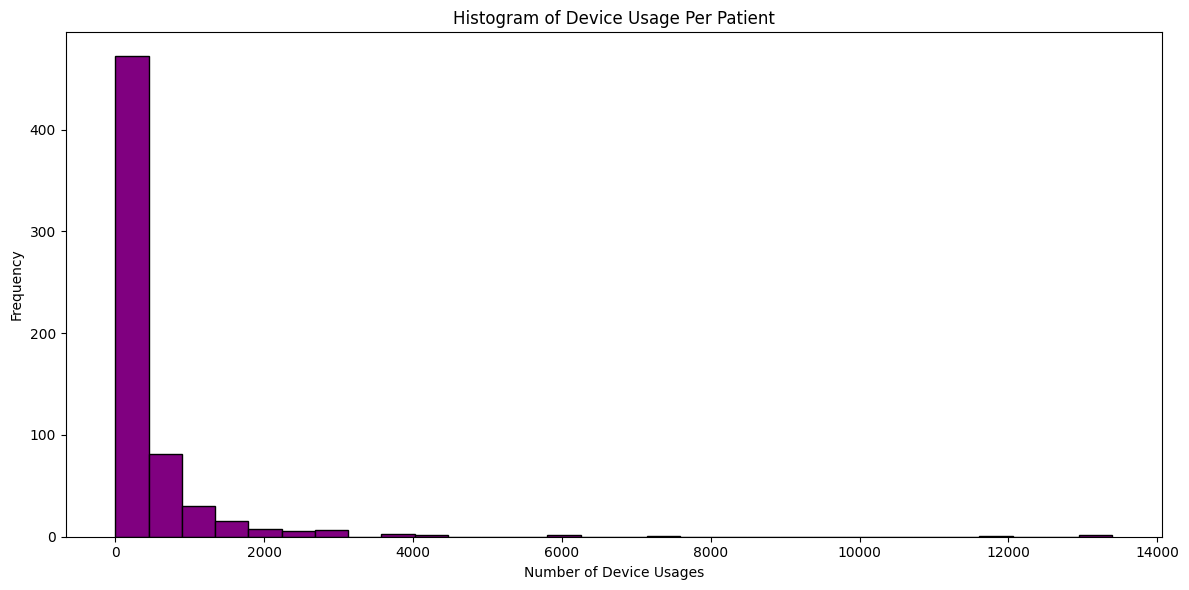


Most Frequently Used Devices:
device
Urinary catheter                      90694
Central venous catheter               89345
Arterial blood pressure catheter      69931
Nasogastric/orogastric tube stylet    64188
Endotracheal tube                      6761
Name: count, dtype: int64

Least Frequently Used Devices:
device
Urinary catheter                      90694
Central venous catheter               89345
Arterial blood pressure catheter      69931
Nasogastric/orogastric tube stylet    64188
Endotracheal tube                      6761
Name: count, dtype: int64

Records with Missing Device Datetime Information:
Empty DataFrame
Columns: [visit_occurrence_id, device_datetime_hourly, person_id, device]
Index: []


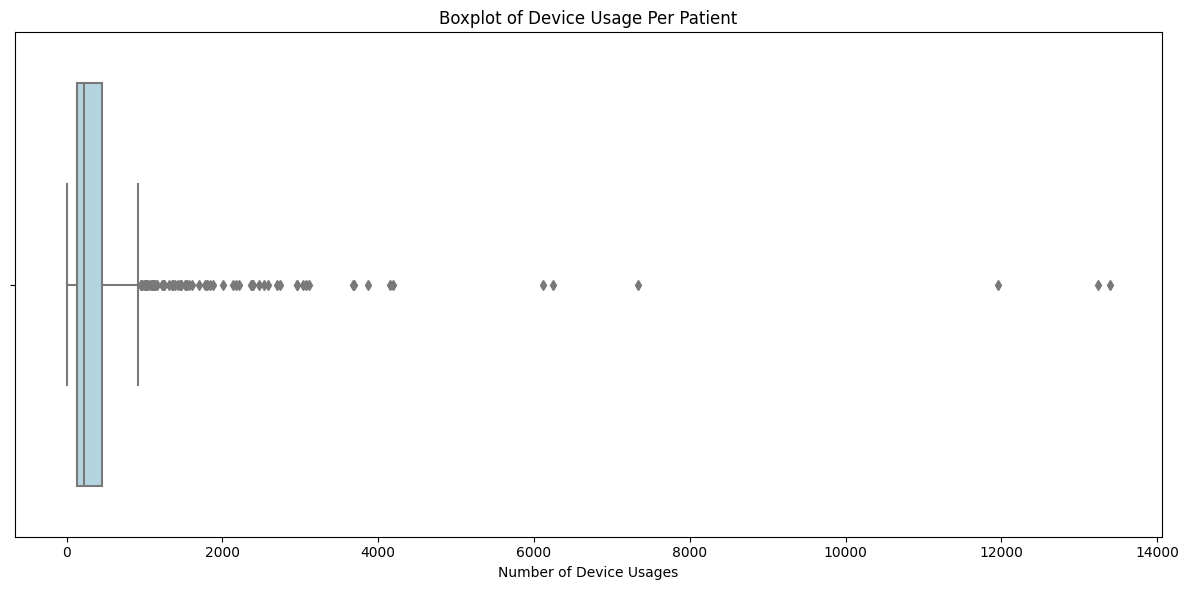

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the devices dataset
devices = pd.read_csv("/kaggle/input/phems-hackathon-early-sepsis-prediction/testing_data/devices_test.csv")

# Exploratory Data Analysis (EDA) on Devices Dataset
print("Devices Dataset Info:")
devices.info()

print("\nFirst Few Rows of Devices Dataset:")
print(devices.head())

print("\nSummary Statistics for Devices Dataset:")
print(devices.describe(include='all'))

# Check for missing values in devices dataset
missing_values = devices.isnull().sum()
print("\nMissing Values in Devices Dataset:\n", missing_values)

# Unique device types
unique_devices = devices['device'].unique()
print(f"\nUnique Devices: {unique_devices}")

# Distribution of device usage
plt.figure(figsize=(12, 6))
device_counts = devices['device'].value_counts()
device_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Device Usage')
plt.xlabel('Device')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Time-based analysis of device usage
devices['device_datetime_hourly'] = pd.to_datetime(devices['device_datetime_hourly'], errors='coerce')
device_usage_by_hour = devices.groupby(devices['device_datetime_hourly'].dt.hour).size()

plt.figure(figsize=(12, 6))
device_usage_by_hour.plot(kind='line', marker='o', color='orange')
plt.title('Device Usage by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Device Usages')
plt.grid()
plt.tight_layout()
plt.show()

# Insights on device usage by patient
usage_per_patient = devices.groupby('person_id').size()
print("\nDevice Usage Per Patient Summary Statistics:")
print(usage_per_patient.describe())

plt.figure(figsize=(12, 6))
usage_per_patient.hist(bins=30, color='purple', edgecolor='black')
plt.title('Histogram of Device Usage Per Patient')
plt.xlabel('Number of Device Usages')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()

# Most frequently used devices
most_used_devices = devices['device'].value_counts().head(5)
print("\nMost Frequently Used Devices:")
print(most_used_devices)

# Least frequently used devices
least_used_devices = devices['device'].value_counts().tail(5)
print("\nLeast Frequently Used Devices:")
print(least_used_devices)

# Devices with missing datetime information
missing_datetime = devices[devices['device_datetime_hourly'].isnull()]
print("\nRecords with Missing Device Datetime Information:")
print(missing_datetime)

# Boxplot of device usage by person_id
plt.figure(figsize=(12, 6))
sns.boxplot(data=usage_per_patient.reset_index(), x=0, color='lightblue')
plt.title('Boxplot of Device Usage Per Patient')
plt.xlabel('Number of Device Usages')
plt.tight_layout()
plt.show()




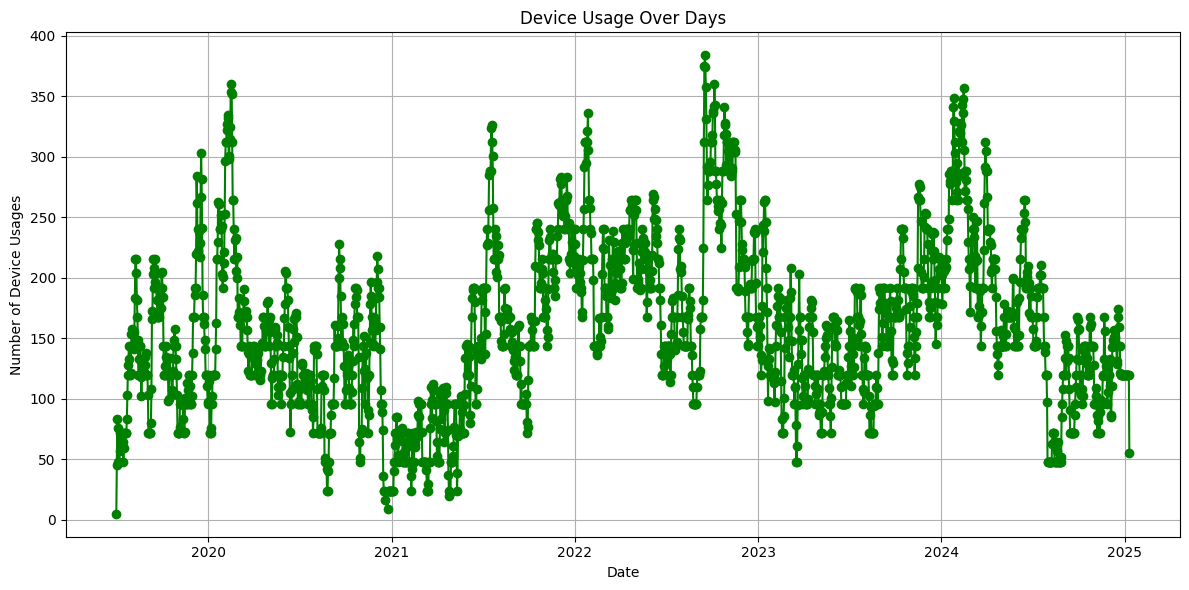


Most Common Device Used Each Hour:
device_datetime_hourly
0     Urinary catheter
1     Urinary catheter
2     Urinary catheter
3     Urinary catheter
4     Urinary catheter
5     Urinary catheter
6     Urinary catheter
7     Urinary catheter
8     Urinary catheter
9     Urinary catheter
10    Urinary catheter
11    Urinary catheter
12    Urinary catheter
13    Urinary catheter
14    Urinary catheter
15    Urinary catheter
16    Urinary catheter
17    Urinary catheter
18    Urinary catheter
19    Urinary catheter
20    Urinary catheter
21    Urinary catheter
22    Urinary catheter
23    Urinary catheter
dtype: object


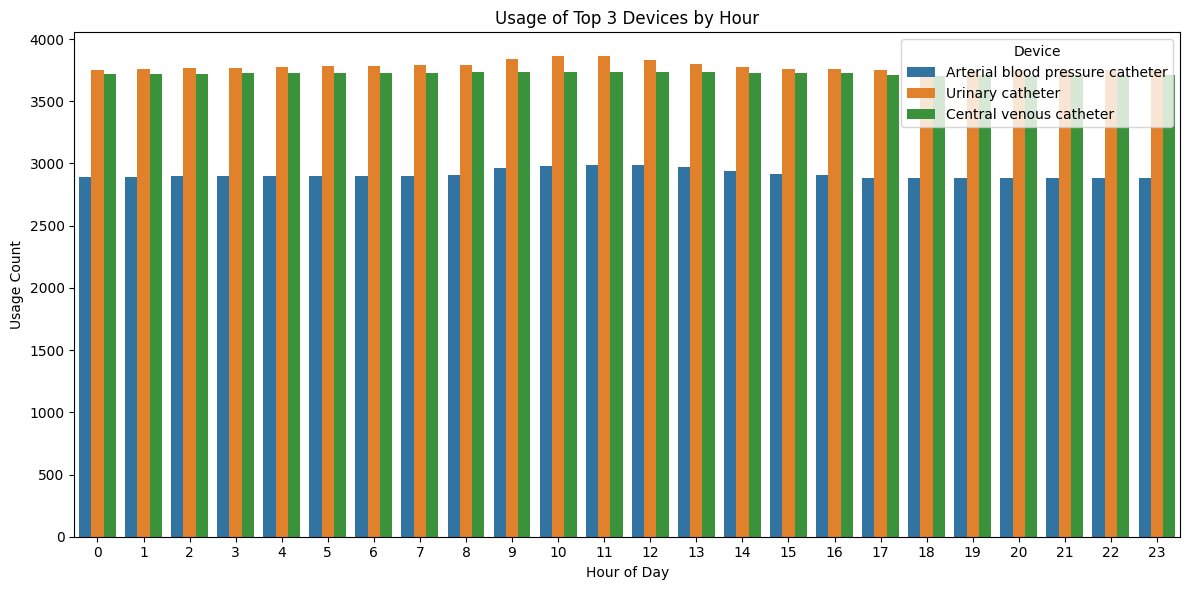

In [3]:
# Analyze trends in device usage over days
devices['device_date'] = devices['device_datetime_hourly'].dt.date
device_usage_by_day = devices.groupby('device_date').size()

plt.figure(figsize=(12, 6))
device_usage_by_day.plot(kind='line', marker='o', color='green')
plt.title('Device Usage Over Days')
plt.xlabel('Date')
plt.ylabel('Number of Device Usages')
plt.grid()
plt.tight_layout()
plt.show()

# Most common devices used per hour
device_hourly_trends = devices.groupby([devices['device_datetime_hourly'].dt.hour, 'device']).size().unstack(fill_value=0)
most_common_device_per_hour = device_hourly_trends.idxmax(axis=1)
print("\nMost Common Device Used Each Hour:")
print(most_common_device_per_hour)

# Visualize hourly trends of top 3 devices
top_3_devices = devices['device'].value_counts().head(3).index
top_3_device_data = devices[devices['device'].isin(top_3_devices)]
plt.figure(figsize=(12, 6))
sns.countplot(data=top_3_device_data, x=top_3_device_data['device_datetime_hourly'].dt.hour, hue='device')
plt.title('Usage of Top 3 Devices by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Usage Count')
plt.legend(title='Device')
plt.tight_layout()
plt.show()
